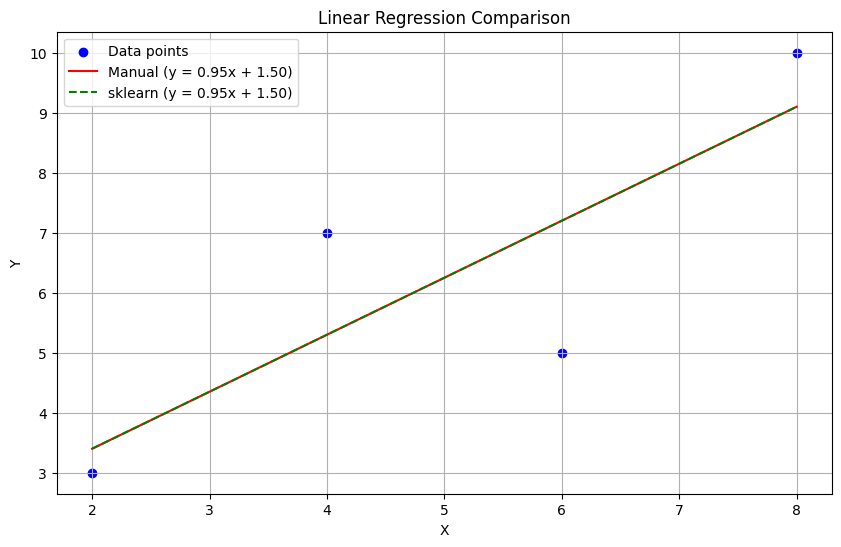

Manual Implementation:
Slope (m): 0.9500
Intercept (b): 1.5000

Scikit-learn Implementation:
Slope (m): 0.9500
Intercept (b): 1.5000

Predictions for X = 15.0:
Manual prediction: 15.7500
Sklearn prediction: 15.7500


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([2, 4, 6, 8])
Y = np.array([3, 7, 5, 10])

# Manual Implementation of Linear Regression
def manual_linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate slope (m) and intercept (b)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    m = numerator / denominator
    b = y_mean - (m * x_mean)
    
    return m, b

# Get manual regression parameters
slope_manual, intercept_manual = manual_linear_regression(X, Y)
y_pred_manual = slope_manual * X + intercept_manual

# Using scikit-learn
X_reshaped = X.reshape(-1, 1)  # Required format for sklearn
model = LinearRegression()
model.fit(X_reshaped, Y)
y_pred_sklearn = model.predict(X_reshaped)

# Prediction function
def predict_value(x_new, method='manual', manual_slope=None, manual_intercept=None, sklearn_model=None):
    """
    Predict a new Y value for a given X using either manual or sklearn model
    Parameters:
        x_new: float or int - the new X value to predict for
        method: str - 'manual' or 'sklearn'
        manual_slope: float - slope from manual regression
        manual_intercept: float - intercept from manual regression
        sklearn_model: LinearRegression object - trained sklearn model
    """
    if method == 'manual':
        if manual_slope is None or manual_intercept is None:
            raise ValueError("Manual method requires slope and intercept parameters")
        return manual_slope * x_new + manual_intercept
    elif method == 'sklearn':
        if sklearn_model is None:
            raise ValueError("Sklearn method requires trained model")
        return sklearn_model.predict(np.array([[x_new]]))[0]
    else:
        raise ValueError("Method must be 'manual' or 'sklearn'")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, y_pred_manual, color='red', label=f'Manual (y = {slope_manual:.2f}x + {intercept_manual:.2f})')
plt.plot(X, y_pred_sklearn, color='green', linestyle='--', 
         label=f'sklearn (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Manual Implementation:")
print(f"Slope (m): {slope_manual:.4f}")
print(f"Intercept (b): {intercept_manual:.4f}")
print("\nScikit-learn Implementation:")
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")

# Example predictions
x_test = float(input("Enter Value to Predict - "))  # Example new X value to predict
manual_pred = predict_value(x_test, method='manual', 
                          manual_slope=slope_manual, 
                          manual_intercept=intercept_manual)
sklearn_pred = predict_value(x_test, method='sklearn', 
                           sklearn_model=model)

print(f"\nPredictions for X = {x_test}:")
print(f"Manual prediction: {manual_pred:.4f}")
print(f"Sklearn prediction: {sklearn_pred:.4f}")